##### Thomas Sheehan
##### Intensive Data Science II
##### Q2 Project: Data Analysis in Python
https://www.kaggle.com/datasets/maso0dahmed/football-players-data/

### Analyzing FIFA Players Dataset:
With Kaggle's FIFA Players Dataset, I used graphs to compare and contrast different categories that FIFA measures. For my first graph, I chose to use a scatterplot to show the correlation between age and overall rating amongst professional soccer players. I also used a correlation test to further analyze the data. In my second graph, I chose to use to bar-graph subplots measuring nationality vs overall rating and nationality vs aggression rating. For the subplots, I chose a few random countries and was able to notice which were better at soccer.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df = pd.read_csv("fifa_players.csv")
df.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87


### Graph 1 Overview
The graph below compares the age and overall ratings of the players in the dataset. It is apparent that the younger players are often rated lower, but as they get older, their rating increases. It seems that the "prime" of most players is around 25-35 years old as the highest outliers fall into this age range. After 35; however, there is a clear droppoff in both overall rating and the amount of datapoints. This dropoff indicates that many players begin to decline in their late thirties, often leading to their retirement. I also ran a correlation test on this graph which showed a moderate postive correlation. This means that oftentimes an increase in age is matched with an increase in overall rating and vise versa. 

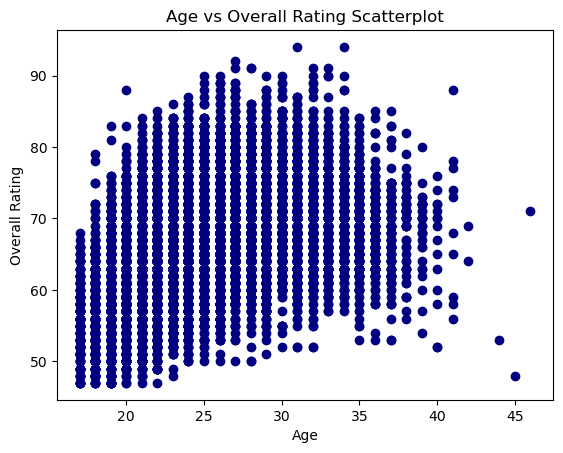

In [3]:
fig, ax = plt.subplots()
plt.scatter(df["age"], df["overall_rating"], color = "navy") 
ax.set_ylabel("Overall Rating")
ax.set_xlabel("Age")
ax.set_title("Age vs Overall Rating Scatterplot")
plt.show()

In [4]:
stats.pearsonr(df["age"], df["overall_rating"])

PearsonRResult(statistic=0.4615292213212578, pvalue=0.0)

In [5]:
grouped = df.groupby("nationality")
rating = grouped.mean()["overall_rating"]
grouped = df.groupby("nationality")
aggro = grouped.mean()["aggression"]

/var/folders/xx/fnd6tlqj7l7bh4twgw39xj7c0000gn/T/ipykernel_74760/1145607187.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rating = grouped.mean()["overall_rating"]
/var/folders/xx/fnd6tlqj7l7bh4twgw39xj7c0000gn/T/ipykernel_74760/1145607187.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggro = grouped.mean()["aggression"]


### Graph 2: Subplots Overview
The following subplots display the correlation between various nationalities and their corresponding overall rating and aggresion rating. As expected, it can be observed that the countries that are ranked lower in the world FIFA rankings have lower rated players. This dropoff is even clearer in the aggression vs overall graph, which I found to be interesting as aggression does not really correlate to actual soccer ability. It made me question how arbitrary aggression ratings really are.

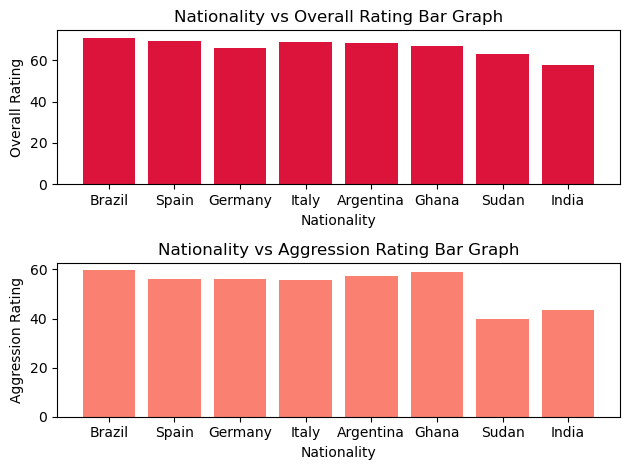

In [6]:
fig2, (ax1, ax2) = plt.subplots(2,1)
countries = ["Brazil", "Spain", "Germany", "Italy", "Argentina", "Ghana", "Sudan", "India"]

ax1.bar(countries, rating.loc[countries], color = "crimson")
ax2.bar(countries, aggro.loc[countries], color = "salmon")

ax1.set_ylabel("Overall Rating")
ax1.set_xlabel("Nationality")
ax1.set_title("Nationality vs Overall Rating Bar Graph")
ax2.set_ylabel("Aggression Rating")
ax2.set_xlabel("Nationality")
ax2.set_title("Nationality vs Aggression Rating Bar Graph")

fig2.tight_layout()

### Concluding Analysis
By using graphs to visualize the FIFA Players dataset, I was able to point out various correlations in the data. For instance, I noticed that age and overall rating had a moderately positive correlation, indicating that an increase in age generally results in an increase in overall rating (oftentimes until the player enters their late thirties and begins to decline). In my subplots, I compared various countries by their overall and aggression ratings. This allowed me to get an overview of which countries are better than others at soccer in the eyes of FIFA.